# Основы визуализации данных с помощью Matplotlib

## Домашнее задание

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных.

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` – порядковый номер записи в датасете
* `Name` – наименование игры
* `Platform` – платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` – год выпуска игры
* `Genre` – жанр игры
* `Publisher` – наименование компании-издателя игры
* `NA_Sales` – объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` – объем продаж игры в Европе, млн. копий
* `JP_Sales` – объем продаж игры в Японии, млн. копий
* `Other_Sales` – объем продаж игры в остальных странах, млн. копий
* `Global_Sales` – объем продаж игры по всему миру, млн. копий

### Критерии оценки

**Зачет** – выполнены задачи 1-9, каждый график отформатирован и читаем

**На доработку** – выполнены не все обязательные задачи или какой-либо из графиков не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, необходимые для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

In [26]:
#создаем серию группированную по величине продаж
sal_jp = df.groupby('Name')['JP_Sales'].mean()
sal_jp

Name
'98 Koshien                                0.12
.hack//G.U. Vol.1//Rebirth                 0.17
.hack//G.U. Vol.2//Reminisce               0.00
.hack//G.U. Vol.2//Reminisce (jp sales)    0.16
.hack//G.U. Vol.3//Redemption              0.17
                                           ... 
thinkSMART: Chess for Kids                 0.00
uDraw Studio                               0.00
uDraw Studio: Instant Artist               0.00
wwe Smackdown vs. Raw 2006                 0.00
¡Shin Chan Flipa en colores!               0.14
Name: JP_Sales, Length: 11493, dtype: float64

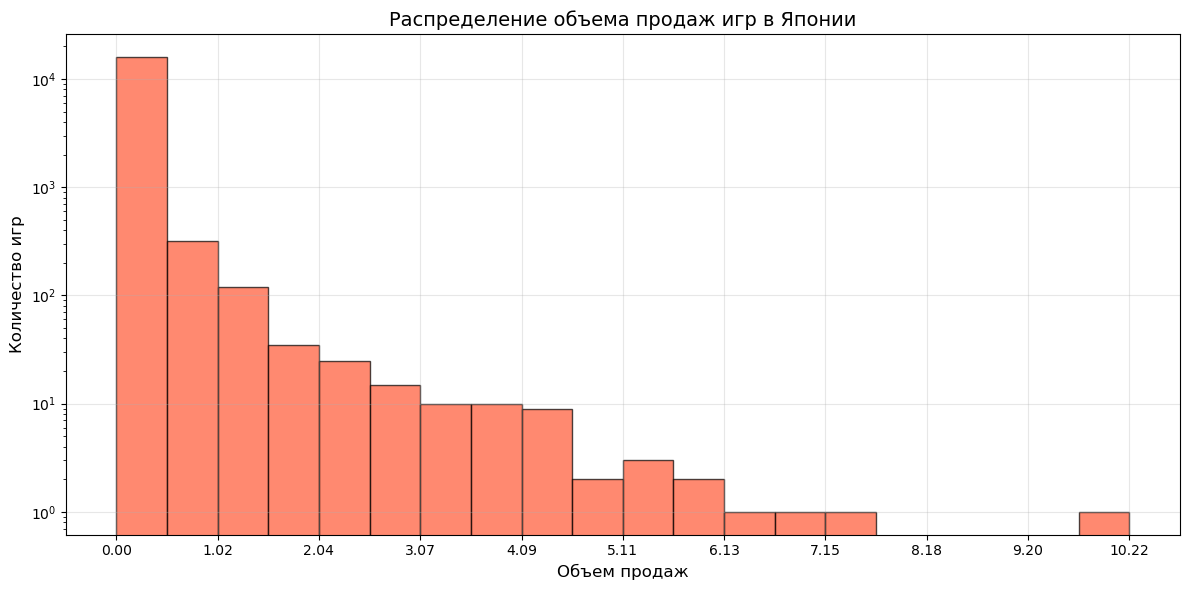

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df['JP_Sales'], bins=20, alpha=0.7, color='#FF5733', edgecolor='black', log=True)

#настройка графика
plt.title('Распределение объема продаж игр в Японии', fontsize=14)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.grid(True, alpha=0.3)

#вычисление осси х
bind_x = df['JP_Sales'].max() / 10 #шаг для меток оси х
x_range = [x * bind_x for x in range(11)]
plt.xticks(x_range)

plt.tight_layout()
plt.show()

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'PS3'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS4'),
  Text(3, 0, 'XOne'),
  Text(4, 0, 'PC')])

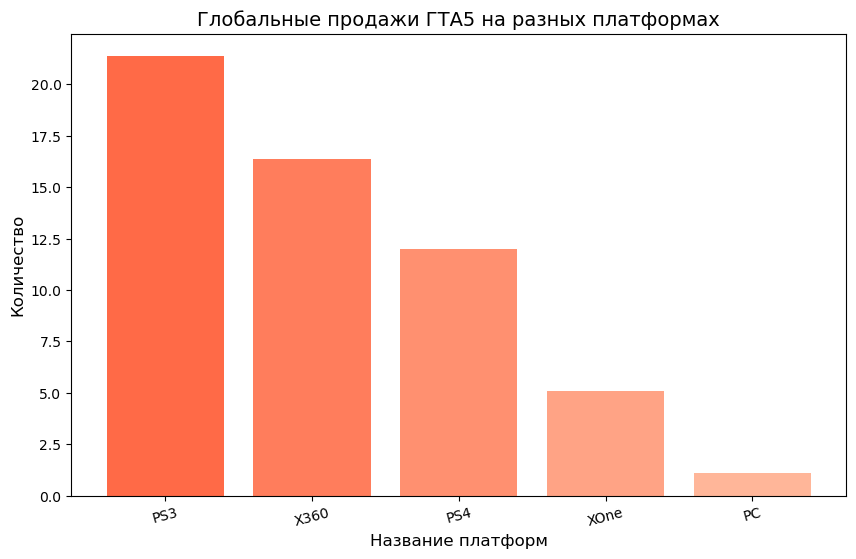

In [62]:
#получаем требуемую таблицу
in_bar = df[df['Name'] == 'Grand Theft Auto V']
#настройка графика
plt.figure(figsize=(10, 6))
plt.bar(in_bar['Platform'], in_bar['Global_Sales'], color=['#FF6A47', '#FF7D5C', '#FF9070', '#FFA385', '#FFB699'])
plt.title('Глобальные продажи ГТА5 на разных платформах', fontsize=14)
plt.xlabel('Название платформ', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=15)


### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам.

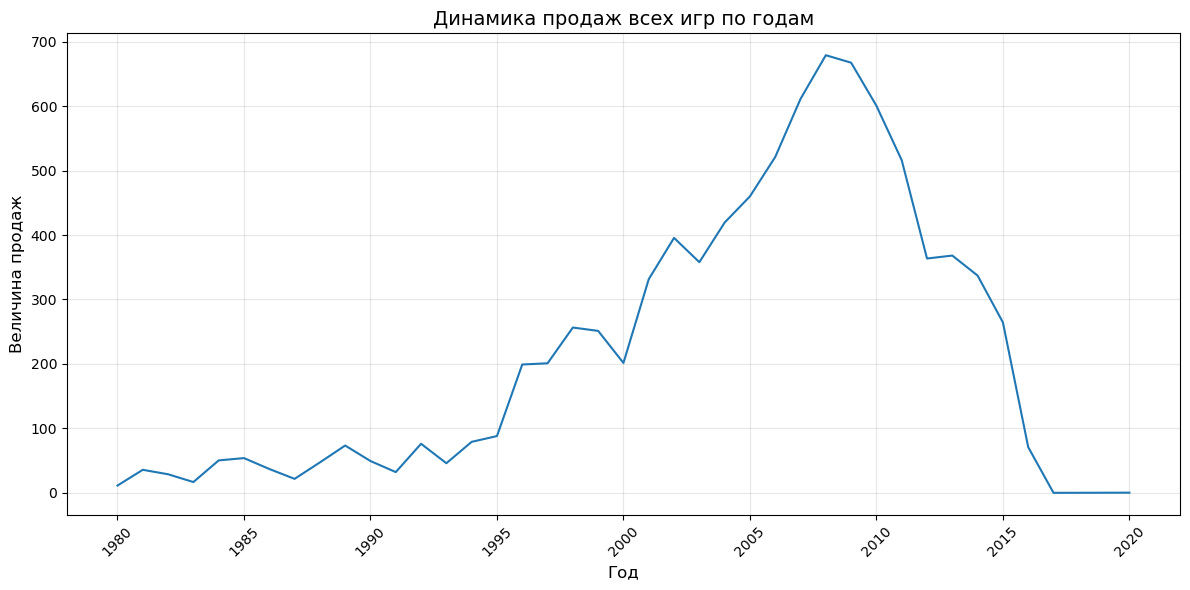

In [68]:
#создаем серию группированную по глобальным продажам
series3 = df.groupby('Year')['Global_Sales'].sum()
#сортировка по возрастанию по году
series3 = series3.sort_index()
#series3
#создание полотна для графика
plt.figure(figsize=(12, 6))
#нанесение значений серии на график
plt.plot(series3)
#Настройка графика
plt.title('Динамика продаж всех игр по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Величина продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

#показать график
plt.show()

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

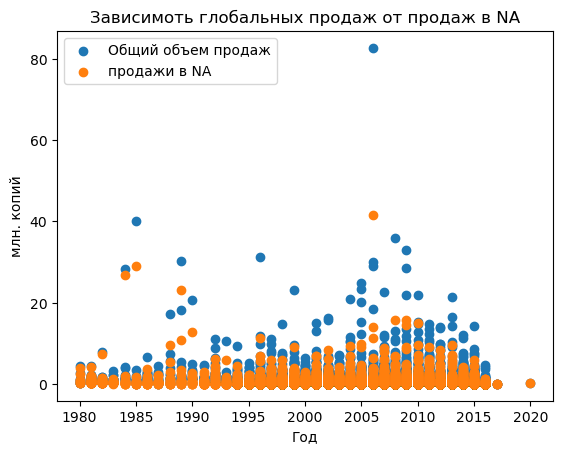

In [84]:
#добавляем столбец с пропорциями: если продажи в NA больше половины от общего количества, то 1 (зависимость есть), иначе 0
df['ProportionNA'] = (df['NA_Sales'] >= df['Global_Sales'] / 2).astype(int)

#точечный график

plt.title("Зависимоть глобальных продаж от продаж в NA")
plt.ylabel('млн. копий')
plt.xlabel('Год')

#добавление легенды
df_0 = df[df['ProportionNA']== 0]
plt.scatter(df['Year'], df['Global_Sales'], label=f"Общий объем продаж")
df_1 = df[df['ProportionNA']== 1]
plt.scatter(df['Year'], df['NA_Sales'], label=f"Продажи в NA")

plt.title("Зависимоть глобальных продаж от продаж в NA")
plt.ylabel('млн. копий')
plt.xlabel('Год')
plt.legend()


### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, 'Продажи Super Mario Bros. на всех платформах по всему миру')

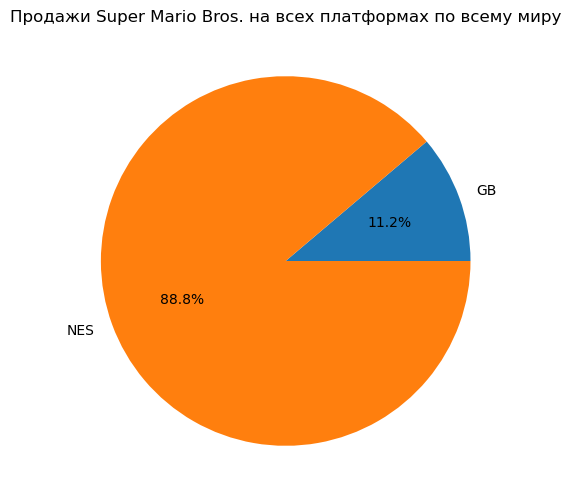

In [98]:
#получаем требуемую таблицу
in_pie = df[df['Name'] == 'Super Mario Bros.']
#группируем по платформе и суммируем продажи
sales_by_platform = in_pie.groupby('Platform')['Global_Sales'].sum()
#настройка графика
plt.figure(figsize=(10, 6))
plt.pie(sales_by_platform, labels = sales_by_platform.index, autopct = '%1.1f%%')
plt.title("Продажи Super Mario Bros. на всех платформах по всему миру")

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

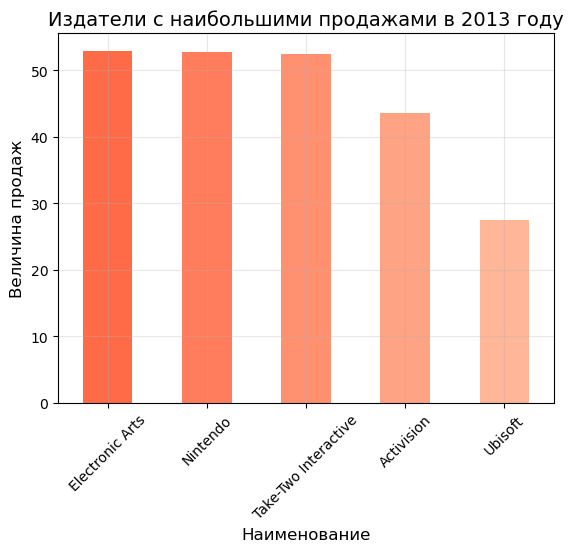

In [120]:
#строим серию с цепочкой: выборкой по 2013 году, группировкой по издателям и сумме продаж,
#сортировкой по убыванию, обрезаем первые пять
df_2013 = (df[df['Year'] == 2013].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5))

#строем гистограмму
df_2013.plot(kind='bar', color=['#FF6A47', '#FF7D5C', '#FF9070', '#FFA385', '#FFB699'])
#настройка графика
plt.title('Издатели с наибольшими продажами в 2013 году', fontsize=14)
plt.xlabel('Наименование', fontsize=12)
plt.ylabel('Величина продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

([<matplotlib.axis.XTick at 0x1db44288410>,
 [Text(0.0, 0, '0.00'),
  Text(1.091, 0, '1.09'),
  Text(2.182, 0, '2.18'),
  Text(3.2729999999999997, 0, '3.27'),
  Text(4.364, 0, '4.36'),
  Text(5.455, 0, '5.46'),
  Text(6.545999999999999, 0, '6.55'),
  Text(7.637, 0, '7.64'),
  Text(8.728, 0, '8.73'),
  Text(9.818999999999999, 0, '9.82'),
  Text(10.91, 0, '10.91'),
  Text(12.001, 0, '12.00'),
  Text(13.091999999999999, 0, '13.09'),
  Text(14.183, 0, '14.18'),
  Text(15.274, 0, '15.27'),
  Text(16.365, 0, '16.36'),
  Text(17.456, 0, '17.46'),
  Text(18.547, 0, '18.55'),
  Text(19.637999999999998, 0, '19.64'),
  Text(20.729, 0, '20.73'),
  Text(21.82, 0, '21.82')])

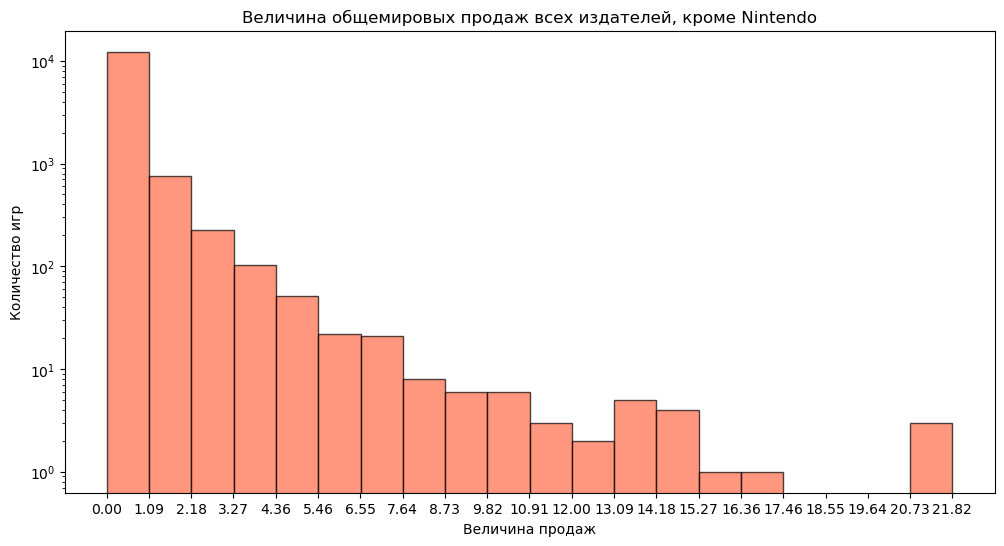

In [170]:
#фильтруем данные: 2000-2015 годы, кроме Nintendo
filtered_data = df[(df['Year'] >= 2000) & (df['Year'] < 2016) & (df['Publisher'] != 'Nintendo')]

#берем только столбец с продажами для гистограммы
sales_values = filtered_data['Global_Sales']

#строем гистограмму
plt.figure(figsize=(12, 6))
plt.hist(sales_values, bins=20, alpha=0.7, color='#FF6A47', edgecolor='black', log=True)

#построение отсечек на оси х
max_sales = sales_values.max()
bind_x = max_sales / 20
x_range = [i * bind_x for i in range(21)]
#подписываем график
plt.title("Величина общемировых продаж всех издателей, кроме Nintendo")
plt.xlabel("Величина продаж")
plt.ylabel("Количество игр")
plt.xticks(x_range)

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам.

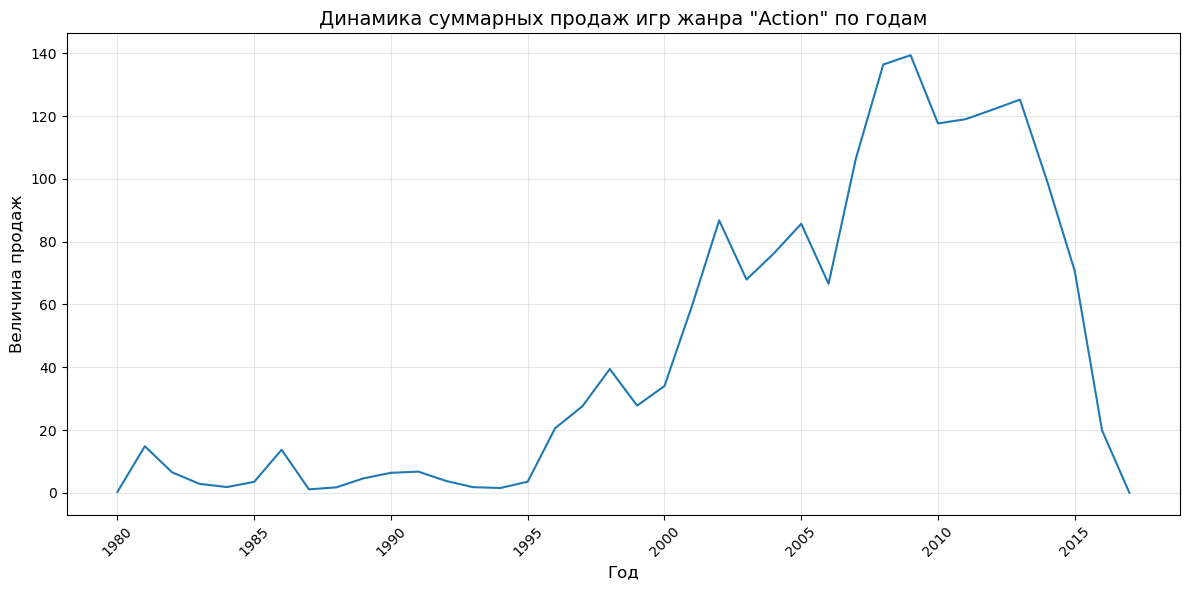

In [163]:
#строим серию с цепочкой: выборкой по жанру "Action", группировкой по годам и сумме продаж,
#сортирировкой по годам (по возрастанию)
df_Action = (df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].sum().sort_index())

#создание полотна для графика
plt.figure(figsize=(12, 6))
#нанесение значений серии на график
plt.plot(df_Action)
#Настройка графика
plt.title('Динамика суммарных продаж игр жанра "Action" по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Величина продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

#показать график
plt.show()

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

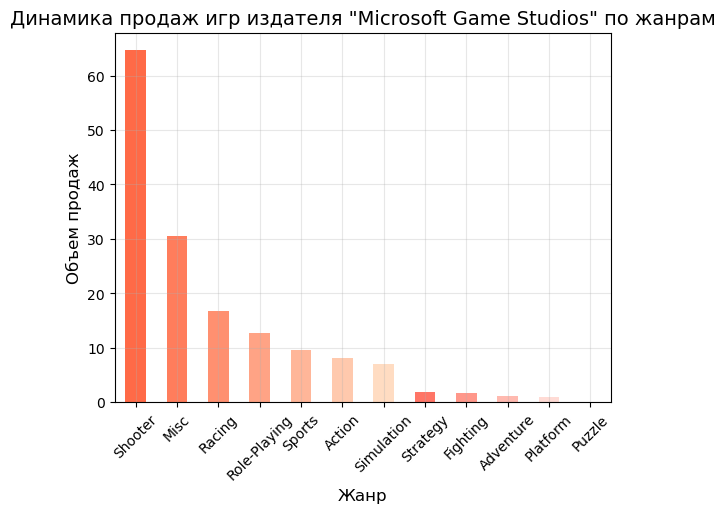

In [173]:
#строим серию с цепочкой: выборкой по издателю 'Microsoft Game Studios', группировкой по жанру и сумме продаж в NA за все время,
#сортировкой по убыванию
df_Microsoft = (df[df['Publisher'] == 'Microsoft Game Studios']).groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

#строем гистограмму
df_Microsoft.plot(kind='bar', color=['#FF6A47', '#FF7D5C', '#FF9070', '#FFA385', '#FFB699', '#FFC9AD', '#FFDCC2', '#FF7566' , '#FF978A', '#FFB9AF', '#FFDBD5'])
#настройка графика
plt.title('Динамика продаж игр издателя "Microsoft Game Studios" по жанрам', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)


## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

Text(0.5, 1.0, 'Процент записей в датасете, имеющих ошибку суммирования продаж')

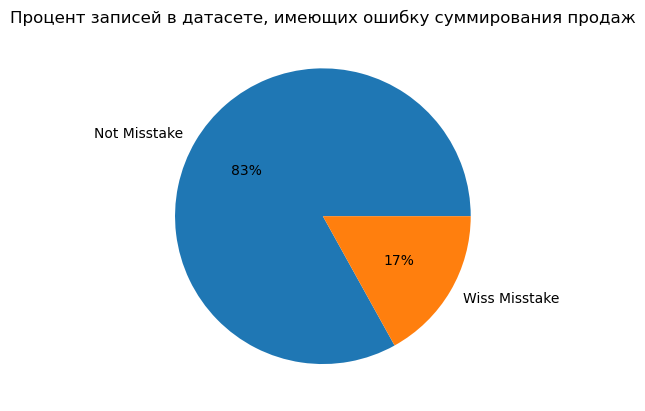

In [184]:
#добавляем столбец с возможной ошибкой: если продажи в сумме соответсвуют 'Global_Sales', то 1, иначе 0
df['Misstake'] = (abs(df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] - df['Global_Sales']) < 0.01).astype(int)
#именуем новую колонку
import numpy as np
df['Misstake'] = np.where(df['Misstake'] == 1, 'Not Misstake', 'Wiss Misstake')
#получаем требуемую таблицу
series10 = df[['Name', 'Misstake']].groupby('Misstake')['Name'].count()
#строим круговую диаграмму
plt.pie(series10, labels = series10.index, autopct = '%1.0f%%')
plt.title('Процент записей в датасете, имеющих ошибку суммирования продаж')


In [181]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,ProportionNA,Misstake
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,Not Misstake
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1,Not Misstake
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0,Wiss Misstake
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0,Not Misstake
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,Wiss Misstake
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1,Not Misstake
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1,Not Misstake
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0,Not Misstake
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0,Not Misstake
